# MNIST Digit Classification with KNN and Naive Bayes

This is the MNIST digit classifications by all the conventional models and latest neural networks with either convolutionary or deep or dropout approach. 

MNIST digits database is the established database in ML/AI, similar to iris_setosa plant classification with later CIFAR-10, CIFAR-100 image classification and more ImageNet. If you're interested, check out these links related to digit recognition:

- Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/  
- Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/  
- Alex CIFAR-10 and CIFAR-100: https://www.cs.toronto.edu/~kriz/cifar.html

MNIST digits have 70,000 images with 10 labels [0, 1, 2, ..., 9] with each label has equal proportion of the database. Each image is 28 x 28 pixels = 784 pixels if flattend or rolled out. It's also worth noting that images are nicely trimmed with the digits at the center, not reflective of the real world data. But it's a good first step towards identifying which digit is which, just by entirely relying on machine learning. 

# MNIST data

1. sklearn library comes with MNIST data by `from sklearn.datasets import fetch_mldata`. 
2. tensorflow library comes with MNIST data by `from tensorflow.examples.tutorials.mnist import input_data`. 

## 1. Sklearn MNIST dataset

sklearn MNIST data have 70,000 images, which we will split into train, validation, and test datasets. The dataset train and val will serve as developing our model, fine-tuning the parameters until we're satisfied with the accuracy. Once we're done with the model, we will use our model for test dataset and see the accuracy. The `test` dataset serve as the final verdict on our model. Once we're done with the `test` data, we're finished with our model development. We cannot go back and fine-tune our model, which would be equivalent to cheating and will introduce bias into our model. Therefore validation step is where we will fine-tune our model the best. 

MNIST dataset from sklearn comes with [0, ..., 255] grayscale pixel values. So we need to transform the pixel values beteen [0, ..., 1]. 

## 2. Tensorflow MNIST dataset

tensorflow MNIST data comes with train (55,000) and test (10,000) images separately. So we will split our train dataset into train and val dataset by 70:30 ratio. Once we're satisfied with the hyperparameters fine-tuning, we will use our model developed in tensorflow to check the test (10,000) images. 

Tensorflow MNIST dataset comes with [0, ..., 1] pixel values. 

# Sklearn MNIST Digit Classification

In [1]:
# Load from the library
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original', data_home='./MNIST_sklearn/')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1]
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points 
# and apply this permutation to X and Y.
# Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
# So Set the randomizer seed so the results are the same each time.
import numpy as np
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape: ', Y.shape)

# Set some variables to hold train, val and test dataset
train_data, train_labels = X[:42000], Y[:42000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]
val_data, val_labels = X[42000:60000], Y[42000:60000]

test_data, test_labels = X[60000:], Y[60000:]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


data shape:  (70000, 784)
label shape:  (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

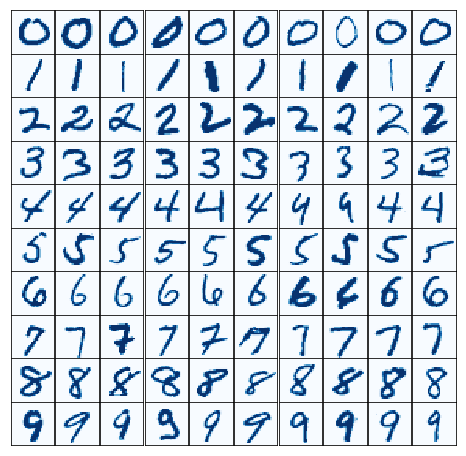

In [15]:
import matplotlib.pyplot as plt

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

def P1(num_examples=10):

    ### STUDENT START ###
    # Kenneth's comment
    # each image is 28 by 28 = 784 pixels
    # There are 70,000 images, corresponding to 70,000 rows with their pixels spread out or unrolled to 784 columns

    # Setting how a plot should look like
    # np.unique chooses the label 0 to 9, total = 10 labels
    # figsize is a tuple value for inches in size
    
    plt.rc('image', cmap='Blues')
    #plt.figure(figsize=(num_examples,len(np.unique(Y))), dpi=X.shape[1])
    plt.figure(figsize=(8,8))
    
    for i in np.nditer(np.unique(Y)):                     # looping all Y labels: 0 to 9
        features = X[Y == i][:num_examples]               # features (785 pixels) for each label (digits), Boolean selection with the label 
        for j in range(num_examples):                     # looping user input, number of examples for each label
            plt.subplot(len(np.unique(Y)), num_examples, i * num_examples + j + 1)   # plt.subplot(nrows, ncols, index)
            plt.subplots_adjust(wspace=0, hspace=0)
            
            ax = plt.gca()                                # assigning plot axes to 'ax'
            ax.set_xticks([])                             # removing ticks on x-axis
            ax.set_yticks([])                             # removing ticks on y-axis
            
            # Plot the corresponding digit (reshaped to square matrix/image)
            dim = int(np.sqrt(X.shape[1]))                # the original image dimension by taking squared root
            digit = features[j].reshape((dim,dim))        # reshaping the unrolled 785 features (pixels) into original dimension (28 x 28)     
            plt.imshow(digit)                             # showing the image
    
    ### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

def P2(k_values):

    ### STUDENT START ###
    
    for k in k_values:
    
        KNN_model = KNeighborsClassifier(n_neighbors=k)            # Create a KNN model 
        KNN_model.fit(mini_train_data, mini_train_labels)          # Fit the model with the mini training set
        predicted_val_labels = KNN_model.predict(val_data)         # predict the dev_data

        print("k-value = {}, Accuracy = {}".format(k, KNN_model.score(val_data, val_labels)))

        # Showing precision, recall, and F1 for each label.
        if k == 1:
            labels = np.unique(Y).astype(int).astype(str)
            print("\nPrecission, recall, and F1 for each digit when k = 1:")
            print(classification_report(val_labels, predicted_val_labels, target_names = labels))


    ### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

k-value = 1, Accuracy = 0.8792777777777778

Precission, recall, and F1 for each digit when k = 1:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1838
           1       0.87      0.99      0.92      2003
           2       0.95      0.86      0.90      1787
           3       0.84      0.89      0.86      1854
           4       0.89      0.83      0.86      1724
           5       0.89      0.81      0.85      1676
           6       0.88      0.94      0.91      1787
           7       0.87      0.89      0.88      1827
           8       0.93      0.77      0.84      1744
           9       0.78      0.83      0.81      1760

   micro avg       0.88      0.88      0.88     18000
   macro avg       0.88      0.88      0.88     18000
weighted avg       0.88      0.88      0.88     18000

k-value = 3, Accuracy = 0.8688888888888889
k-value = 5, Accuracy = 0.865
k-value = 7, Accuracy = 0.8583333333333333
k-value = 9, Accuracy = 0.8

## Note
Precision is when the data the model predicted is correct even if the model still has to predict the rest of the data. Recall is the coverage of the model prediction. The perfect model will have 100% precision and 100% recall. But it's very unlikely and precision and recall is always a tug-of-war in developing a model, depending on the objective we have in mind in our prediction. If we want a high confidence and would like to have more true positive, we need to focus on precision. However if we want to cover more data, i.e., business incentive not to miss customers even if some customers will not buy, then we will focus more on recall. 

Looking at the MNIST digit classification by KNN model with k=1, the f1-score (overall score between precision and recall), s 0.88 or 88%. The accuracy is 0.88 too. This is when we use our mini training data which only have 1000 images. If we increase our training images, would the accuracy increase? 

Indeed, it does. But I'm skipping here because it also takes time to train thousands of images. But the bottom line is, **the more the training images, the longer the training time and the higher the accuracy**. 

# Gaussian Blurring
A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the val data but not the training data
- preprocess both training and val data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

Accuracy of Original mini_train_data + val_data           :  0.8792777777777778
Accuracy of min_train_data blurred + val_data             :  0.9009444444444444
Accuracy of mini_train_data + val_data blurred            :  0.8676111111111111
Accuracy of mini_train_data blurred + val_data blurred    :  0.8992777777777777

Visualization of digit before and after Gaussian blur



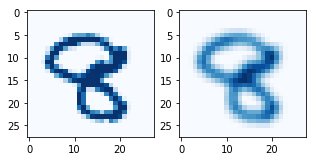

In [22]:
# Gaussian function to blur the pixels by neighboring pixels. The first row and the last row were left intact because
# they all represent 0 and wouldn't make any difference. The edge of the pixels were processed although their 
# neighboring pixels will be a bit off. The idea is just to make the function concise, instead of going over 
# all the edges. 

def gaussian_blur(array):

    blurred_pixels = []

    for i in range(len(array)): 
        if i < 30: 
            blurred_pixels.append(array[i])
        elif i > 755: 
            blurred_pixels.append(array[i])
        else:
            try:
                blurred_pixels.append(np.mean([array[i-29], array[i-28], array[i-27],
                                        array[i-1], array[i], array[i+1],
                                        array[i+27], array[i+28], array[i+29]]))
            except:
                blurred_pixels.append(array[i])

    return blurred_pixels

# Preprocess the mini_train_data 

mini_train_data_blurred = []
for digit in mini_train_data:
    mini_train_data_blurred.append(gaussian_blur(digit))
mini_train_data_blurred = np.array(mini_train_data_blurred)

# Preprocess the dev_data 

val_data_blurred = []
for digit in val_data:
    val_data_blurred.append(gaussian_blur(digit))
val_data_blurred = np.array(val_data_blurred)

# Fit model using original mini_train_data

KNN1 = KNeighborsClassifier(n_neighbors=1)
KNN1.fit(mini_train_data, mini_train_labels)
KNN1.predict(val_data)
print("Accuracy of Original mini_train_data + val_data           : ", KNN1.score(val_data, val_labels))

KNN2 = KNeighborsClassifier(n_neighbors=1)
KNN2.fit(mini_train_data_blurred, mini_train_labels)
KNN2.predict(val_data)
print("Accuracy of min_train_data blurred + val_data             : ", KNN2.score(val_data, val_labels))

KNN3 = KNeighborsClassifier(n_neighbors=1)
KNN3.fit(mini_train_data, mini_train_labels)
KNN3.predict(val_data_blurred)
print("Accuracy of mini_train_data + val_data blurred            : ", KNN3.score(val_data_blurred, val_labels))

KNN4 = KNeighborsClassifier(n_neighbors=1)
KNN4.fit(mini_train_data_blurred, mini_train_labels)
KNN4.predict(val_data_blurred)
print("Accuracy of mini_train_data blurred + val_data blurred    : ", KNN4.score(val_data_blurred, val_labels))

print("\nVisualization of digit before and after Gaussian blur\n")
rand_num = np.random.randint(0, 1000,1)              # selecting any random digit between 0 and 1000 mini_train_data
plt.figure(figsize=(5,5))
plt.subplot(1, 2, 1)

plt.imshow(mini_train_data[rand_num].reshape((28,28)))
plt.subplot(1, 2, 2)

plt.imshow(mini_train_data_blurred[rand_num].reshape((28,28)))

## Note
You see that blurring the training image is the most important step in achieving better accuracy at 90%, even better than the last time 88%. It does not matter if you blur your validation dataset, it still gives the same accuracy at 90%. So what it's doing is, by blurring the training data set, we're trying not to overfit our model and making it more generalized model. Not bad, with the mini training data with 1000 images, we now achieve 90% accuracy. Let's test our model for test images (10,000 images). Remember, the model we trained with blurred images is **KNN2**. 

In [23]:
KNN2.predict(test_data)
print("Accuracy of min_train_data blurred + test_data             : ", KNN2.score(test_data, test_labels))

Accuracy of min_train_data blurred + test_data             :  0.9002


## Note
We see that the accuracy for our test is 90%, which is pretty good. So blurring the training images to avoid overfitting actually helps to increase our model accuracy. 

# Naive Bayes Classification

Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [2]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

BNB = BernoulliNB(alpha=1, binarize=0.333)
BNB.fit(mini_train_data, mini_train_labels)
BNB.predict(val_data)
print("Accuracy of Bernoulli Naive Bayes   : {}".format(BNB.score(val_data, val_labels)))

# Preprocess the training data (pixel) to be 0, 1, 2
mini_train_data_copy = mini_train_data.copy()
mini_train_data_copy[mini_train_data_copy < 0.10] = 0
mini_train_data_copy[np.logical_and(mini_train_data_copy < 0.80, mini_train_data_copy >=0.1)] = 1
mini_train_data_copy[mini_train_data_copy >= 0.80] = 2

# Training with MultinomialNB
MNB = MultinomialNB()
MNB.fit(mini_train_data_copy, mini_train_labels)
MNB.predict(val_data)
print("Accuracy of Multinomial Naive Bayes : {}".format(MNB.score(val_data, val_labels)))

Accuracy of Bernoulli Naive Bayes   : 0.8073333333333333
Accuracy of Multinomial Naive Bayes : 0.7922222222222223


In [17]:
# Source https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html

print(BNB.class_log_prior_)
print(MNB.class_log_prior_)

[-2.3859667  -2.24431618 -2.24431618 -2.18925641 -2.39689577 -2.43041846
 -2.29263476 -2.29263476 -2.3859667  -2.19822508]
[-2.3859667  -2.24431618 -2.24431618 -2.18925641 -2.39689577 -2.43041846
 -2.29263476 -2.29263476 -2.3859667  -2.19822508]


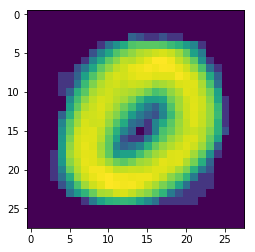

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

# This is to show that Naive Bayes is a generative learning model, which means depending on the particular y label
# it will generate the probability of x (784 pixels) aggregated over all the same y label, eg, digit `0`. 
# those aggregated probability can be called by BNB.feature_log_prob_
# all those values are negative, and we can convert them into positive by taking np.exp(BNB.feature_log_prob[0])

plt.imshow(BNB.feature_log_prob_[0].reshape(28, 28))


## Checking the log likelihood at different pixel position for each of the labels

- Evidently, there's no much difference at the position 0 because the position does not have any obvious influence on the digit classification. 
- However, at the pixel position at 430, we'd see that there are significant log likelihood difference between each label. 

In [22]:
print("This is the log likelihood for a pixel position at 0 for digit 0 : ", BNB.feature_log_prob_[0][0])
print("This is the log likelihood for a pixel position at 0 for digit 1 : ", BNB.feature_log_prob_[1][0])
print("This is the log likelihood for a pixel position at 0 for digit 2 : ", BNB.feature_log_prob_[2][0])
print("This is the log likelihood for a pixel position at 0 for digit 3 : ", BNB.feature_log_prob_[3][0])
print("This is the log likelihood for a pixel position at 0 for digit 4 : ", BNB.feature_log_prob_[4][0])
print("This is the log likelihood for a pixel position at 0 for digit 5 : ", BNB.feature_log_prob_[5][0])
print("This is the log likelihood for a pixel position at 0 for digit 6 : ", BNB.feature_log_prob_[6][0])
print("This is the log likelihood for a pixel position at 0 for digit 7 : ", BNB.feature_log_prob_[7][0])
print("This is the log likelihood for a pixel position at 0 for digit 8 : ", BNB.feature_log_prob_[8][0])
print("This is the log likelihood for a pixel position at 0 for digit 9 : ", BNB.feature_log_prob_[9][0])

This is the log likelihood for a pixel position at 0 for digit 0 :  -4.543294782270004
This is the log likelihood for a pixel position at 0 for digit 1 :  -4.68213122712422
This is the log likelihood for a pixel position at 0 for digit 2 :  -4.68213122712422
This is the log likelihood for a pixel position at 0 for digit 3 :  -4.736198448394496
This is the log likelihood for a pixel position at 0 for digit 4 :  -4.532599493153256
This is the log likelihood for a pixel position at 0 for digit 5 :  -4.499809670330265
This is the log likelihood for a pixel position at 0 for digit 6 :  -4.634728988229636
This is the log likelihood for a pixel position at 0 for digit 7 :  -4.634728988229636
This is the log likelihood for a pixel position at 0 for digit 8 :  -4.543294782270004
This is the log likelihood for a pixel position at 0 for digit 9 :  -4.727387818712341


In [23]:
print("This is the log likelihood for a pixel position at 430 for digit 0 : ", BNB.feature_log_prob_[0][430])
print("This is the log likelihood for a pixel position at 430 for digit 1 : ", BNB.feature_log_prob_[1][430])
print("This is the log likelihood for a pixel position at 430 for digit 2 : ", BNB.feature_log_prob_[2][430])
print("This is the log likelihood for a pixel position at 430 for digit 3 : ", BNB.feature_log_prob_[3][430])
print("This is the log likelihood for a pixel position at 430 for digit 4 : ", BNB.feature_log_prob_[4][430])
print("This is the log likelihood for a pixel position at 430 for digit 5 : ", BNB.feature_log_prob_[5][430])
print("This is the log likelihood for a pixel position at 430 for digit 6 : ", BNB.feature_log_prob_[6][430])
print("This is the log likelihood for a pixel position at 430 for digit 7 : ", BNB.feature_log_prob_[7][430])
print("This is the log likelihood for a pixel position at 430 for digit 8 : ", BNB.feature_log_prob_[8][430])
print("This is the log likelihood for a pixel position at 430 for digit 9 : ", BNB.feature_log_prob_[9][430])

This is the log likelihood for a pixel position at 430 for digit 0 :  -1.1093075777848576
This is the log likelihood for a pixel position at 430 for digit 1 :  -3.9889840465642745
This is the log likelihood for a pixel position at 430 for digit 2 :  -0.6747980418917487
This is the log likelihood for a pixel position at 430 for digit 3 :  -1.09861228866811
This is the log likelihood for a pixel position at 430 for digit 4 :  -0.2699196161119408
This is the log likelihood for a pixel position at 430 for digit 5 :  -0.8362480242006187
This is the log likelihood for a pixel position at 430 for digit 6 :  -0.25270235355575466
This is the log likelihood for a pixel position at 430 for digit 7 :  -2.6888188391743224
This is the log likelihood for a pixel position at 430 for digit 8 :  -0.9323768696257795
This is the log likelihood for a pixel position at 430 for digit 9 :  -0.39665447842600976


In [44]:
# This is the log-likelihood of the 784 pixels given the label 6

BNB.feature_log_prob_[6]

array([-4.63472899, -4.63472899, -4.63472899, -4.63472899, -4.63472899,
       -4.63472899, -4.63472899, -4.63472899, -4.63472899, -4.63472899,
       -4.63472899, -4.63472899, -4.63472899, -4.63472899, -4.63472899,
       -4.63472899, -4.63472899, -4.63472899, -4.63472899, -4.63472899,
       -4.63472899, -4.63472899, -4.63472899, -4.63472899, -4.63472899,
       -4.63472899, -4.63472899, -4.63472899, -4.63472899, -4.63472899,
       -4.63472899, -4.63472899, -4.63472899, -4.63472899, -4.63472899,
       -4.63472899, -4.63472899, -4.63472899, -4.63472899, -4.63472899,
       -4.63472899, -4.63472899, -4.63472899, -4.63472899, -4.63472899,
       -3.94158181, -4.63472899, -4.63472899, -4.63472899, -4.63472899,
       -4.63472899, -4.63472899, -4.63472899, -4.63472899, -4.63472899,
       -4.63472899, -4.63472899, -4.63472899, -4.63472899, -4.63472899,
       -4.63472899, -4.63472899, -4.63472899, -4.63472899, -4.63472899,
       -3.94158181, -3.5361167 , -3.24843463, -3.5361167 , -2.55

In [46]:
# I'm trying to do matrix multiplication by np.dot()
# but the value doesn't match with the predicted log probability done below
# this means, there must be bias value missing? 

wt = BNB.feature_log_prob_[6]
X = val_data[0:1]
result = np.dot(X, wt)
result

array([-91.43399598])

In [41]:
test_image1 = BNB.predict(val_data[0:1])
test_image1

array([6.])

In [43]:
test_image1_log = BNB.predict_log_proba(val_data[0:1])
test_image1_log

array([[ -98.53804044, -266.3379028 , -100.30912462, -106.55608816,
        -112.08504596,  -75.91846471,    0.        , -197.91196659,
         -97.1972189 , -132.18424265]])

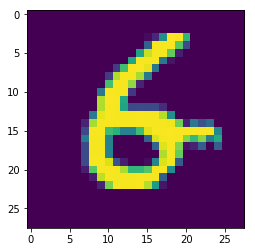

In [42]:
plt.imshow(val_data[0:1].reshape(28, 28))

In [52]:
val_labels

array([6., 4., 3., ..., 0., 5., 5.])

### Note

So far you have seen that digit classification by KNN gives at 88% accuracy. When we blurred the training data, the accuracy goes up to 90%. 

When we use the Naive Bayes, the accuracy is 80%. 

KNN works by going through all the training images, and calculating the absolute distance between each pixel from all the training images and the corresponding pixel from the test image. After calculating the absolute distance, it will match against the closet image. You may argue that it would make sense, if the cat in training image is jumping and the test image with a sitting cat will have a very huge distance, considering each pixel will be entirely different in their respective location. You are exactly right. That's why KNN works well when you have almost similar still images such as MNIST digits here in this case, and it gives us the 88% accuracy already. But KNN performs very poorly when it comes to object detection and text classification due to the issues we just discussed, i.e, entirely relying on each pixel (or feature) numerical distance in the respective position. 

Naive Bayes, on the other hand, is a generative model. What it does it, depending on the particular y label, it will accumulate all the probabilities for the certain position from all the training images. For example, given the digit being `0`, the log-likelihood at the pixel position at `15` is `-2.123` or so. By converting that into probabilities, `np.exp(-2.1230 = 0.11967`. Given the digit being `1`, the maximum likelihood of the pixel value at the same position `15` is `-1.123`, when converted to probabilities `np.exp(-1.123) = 0.3253`. The probabilities of pixel value at position `15` has changed from 12% to 33% by changing the label condition. 

So when we use our test image, we don't know the label yet, given the position `15` at our test image, the pixel value in our test image is, for example, 0.123 or so. This is pixel value, not the probabilities. So that pixel value 0.123 will be tested against the log-likelihood of the digit `0`, `1`, etc at the postion `15`. So basically, the log-likelihood generated from Naive Bayes will serve as the weight for our image classification. 

**Note for log likelihood**  
https://stats.stackexchange.com/questions/140463/can-the-likelihood-take-values-outside-of-the-range-0-1
The likelihood function is a product of density functions for independent samples. A density function can have non-negative values. The log-likelihood is the logarithm of a likelihood function. If your likelihood function L(x) has values in (0,1) for some x, then the log-likelihood function logL(x) will have values between (−∞,0). For L(x)∈[1,∞) the logL(x)∈[0,∞). So −34.82 is a typical value for a log-likelihood function.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [31]:
from sklearn.model_selection import GridSearchCV

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}

# Without using GridSearchCV, just looping
for value in alphas.values():
    for j in range(len(value)):
        BNB = BernoulliNB(alpha=value[j], binarize=0.333)
        BNB.fit(mini_train_data, mini_train_labels)
        print("Accuracy of Bernoulli Naive Bayes with alpha {:.4f} : {}".format(value[j], BNB.score(val_data, val_labels)))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Accuracy of Bernoulli Naive Bayes with alpha 0.0000 : 0.8032222222222222
Accuracy of Bernoulli Naive Bayes with alpha 0.0001 : 0.8154444444444444
Accuracy of Bernoulli Naive Bayes with alpha 0.0010 : 0.8164444444444444
Accuracy of Bernoulli Naive Bayes with alpha 0.0100 : 0.8167777777777778
Accuracy of Bernoulli Naive Bayes with alpha 0.1000 : 0.8158333333333333
Accuracy of Bernoulli Naive Bayes with alpha 0.5000 : 0.8113333333333334
Accuracy of Bernoulli Naive Bayes with alpha 1.0000 : 0.8073333333333333
Accuracy of Bernoulli Naive Bayes with alpha 2.0000 : 0.8008333333333333
Accuracy of Bernoulli Naive Bayes with alpha 10.0000 : 0.7581666666666667


## Note
So far Naive Bayes with or without laplace smoothing does not even achieve our baseline accuracy at 88% with K-nearest Neighbor with k=1 value, let alone Gaussian blurring our mini training images. Gaussian Naive Bayes (GNB) is also tested with a range of sigma. However GNB performed poorly with the lowest accuracy at 50% and highest accuracy at 80% with sigma = 0.2. 

# ------------

# TensorFlow in Action

Tensorflow is a library developed by Google for high-end mathematical operations with computational efficiency either in CPU or GPU. Later they developed more tensor-centric processing unit, called TPU. Tensorflow is basically DAG (Directed Acyclic Graph), with each node representing a mathematical operation, the output is directed to other nodes. So essentially, the operation is placed in the node, and the output is held until we execute the entire session. 

Intuitively, you can imagine you can use tensorflow for a simple math calculation. But it would be an overkill because of the complexity of the operation and opening and closing the tensorflow session in order to receive the output. If you're operating a more high abstract operations such as neural networks, tensorflow is a choice. 

Here we will use tensorflow, beginning from a very simple operation such as linear regressor and continue towards adding more layers into our networks, making a deep neural networks (DNN). We even try to use the convolutionary neural networks, which is basically transforming each input vectors into a small vector. 

1. <a href="https://www.tensorflow.org/api_docs/python/tf/nn" target="_blank">Tensorflow parameters details</a>. 
2. <a href="https://www.katacoda.com/basiafusinska/scenarios/tensorflow-layers">Good example of tensorflow execution in MNIST classification</a>

## Load Tensorflow MNIST data

Extracting MNIST_tf/train-images-idx3-ubyte.gz
Extracting MNIST_tf/train-labels-idx1-ubyte.gz
Extracting MNIST_tf/t10k-images-idx3-ubyte.gz
Extracting MNIST_tf/t10k-labels-idx1-ubyte.gz


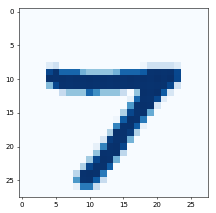

In [58]:
# Loading and Checking the images
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

def read_mnist(folder_path="MNIST_tf/"):
    return input_data.read_data_sets(folder_path, one_hot=True, reshape=False)

# load the image dataset
mnist = read_mnist()

HEIGHT= 28
WIDTH=28
NCLASSES=10

np.random.seed(42)
rand_num = np.random.randint(0, mnist.train.images.shape[0],1) 
plt.figure(figsize=(5,5), dpi=50)
plt.imshow(mnist.train.images[rand_num].reshape(HEIGHT, WIDTH));

## Overview of how the MNIST digit dataset looks like

<p align="center">
<img src="img/1.png" width="500"></p>

## Linear Model implemented by Tensorflow 

<p align="center">
<img src="img/3.png" width="500"></p>

Each data will be directly translated by the output vector (weight + bias). Each data will generate 10 logit values. Softmax will then transform them into probabilities, all 10 labels summing up to 1 because each label is mutually exclusive, i.e., if the digit is `1`, it cannot be another digits. 

There are two approaches to try a linear model with tensorflow. 
1. conventional approach, building from scratch with weight and bias, using low-level tensorflow
2. tensorflow method, with built-in high level tensorflow function for linear regressor

Note we can also build our linear classifer using the tf.layers API. Notice when using tf.layers we don't have to define or initialize our weights and biases. This happens automatically for us in the background. When building more complex models such as DNNs and CNNs our code will be much more readable by using the tf.layers API

## 1. Linear Model by low-level tensorflow

## Note

Use `tf.get_variable`, which is far more advanced. If you need to share the variable. `tf.Variable` is low-level creation of variable. 

Logit is a function that maps probabilities `[0, 1]` to `[-inf, +inf]`.

Softmax is a function that maps `[-inf, +inf]` to `[0, 1]` similar as Sigmoid. But Softmax also normalizes the sum of the values(output vector) to be 1.

Tensorflow "with logit": It means that you are applying a softmax function to logit numbers to normalize it. The input_vector/logit is not normalized and can scale from [-inf, inf].


In [59]:
# define the linear model, using low-level tensorflow
# matrix multiplication will return the logits value

def linear_model(img):
  X = tf.reshape(img,[-1,HEIGHT*WIDTH])                     #flatten to (1 x 784) matrix for one image
  W = tf.get_variable("W", [HEIGHT*WIDTH,NCLASSES], 
                      initializer = tf.truncated_normal_initializer(stddev=0.1,seed = 1))   # (784 x 10) matrix
  b = tf.get_variable("b",NCLASSES, initializer = tf.zeros_initializer)
  ylogits = tf.matmul(X,W)+b                                # (1 x 784) x (784 x 10) = (1 x 10) image with 10 labels
  return ylogits, NCLASSES

def image_classifier(features, labels, mode, params):
  ylogits, nclasses = linear_model(features['image'])       # Using the above linear_model() function
  probabilities = tf.nn.softmax(ylogits)                    # applying the softmax on ylogits
  classes = tf.cast(tf.argmax(probabilities, 1), tf.uint8)
  
  if mode == tf.estimator.ModeKeys.TRAIN or mode == tf.estimator.ModeKeys.EVAL:
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=ylogits, labels=labels))
    evalmetrics =  {'accuracy': tf.metrics.accuracy(classes, tf.argmax(labels, 1))}
    if mode == tf.estimator.ModeKeys.TRAIN:
      train_op = tf.contrib.layers.optimize_loss(loss, tf.train.get_global_step(),
                                                 learning_rate=params['learning_rate'], optimizer="Adam")
    else:
      train_op = None
  else:
    loss = None
    train_op = None
    evalmetrics = None
 
  return tf.estimator.EstimatorSpec(
        mode=mode,
        predictions={"probabilities": probabilities, "classes": classes},
        loss=loss,
        train_op=train_op,
        eval_metric_ops=evalmetrics,
        export_outputs={'classes': tf.estimator.export.PredictOutput({"probabilities": probabilities, "classes": classes})}
    )

train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'image':mnist.train.images},
    y=mnist.train.labels,
    batch_size=100,
    num_epochs=None,
    shuffle=True,
    queue_capacity=5000
  )

eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'image':mnist.test.images},
    y=mnist.test.labels,
    batch_size=100,
    num_epochs=1,
    shuffle=False,
    queue_capacity=5000
  )

def serving_input_fn():
    inputs = {'image': tf.placeholder(tf.float32, [None, HEIGHT, WIDTH])}
    features = inputs # as-is
    return tf.estimator.export.ServingInputReceiver(features, inputs)

def train_and_evaluate(output_dir, hparams):
  estimator = tf.estimator.Estimator(model_fn = image_classifier,
                                     params = hparams,
                                     model_dir = output_dir)              # use image_classifier() function
  train_spec = tf.estimator.TrainSpec(input_fn = train_input_fn,
                                    max_steps = hparams['train_steps'])
  exporter = tf.estimator.LatestExporter('Servo', serving_input_fn)
  eval_spec = tf.estimator.EvalSpec(input_fn = eval_input_fn,
                                  steps = None,
                                  exporters = exporter)
  tf.estimator.train_and_evaluate(estimator, train_spec, eval_spec)


## Execution

In [60]:
import shutil
OUTDIR='MNIST_tf/learned'
shutil.rmtree(OUTDIR, ignore_errors = True) # start fresh each time

hparams = {'train_steps': 1000, 'learning_rate': 0.01}
train_and_evaluate(OUTDIR, hparams)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'MNIST_tf/learned', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x12bfb3898>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Running training and evaluation locally (non-distributed).
INFO:tensorflow:Start train and evaluate loop. The evaluate will happ

## 2. Linear Model by high-level tensorflow

In [61]:
#Using tf.layers API
def linear_model(img):
  X = tf.reshape(img,[-1,HEIGHT*WIDTH]) #flatten
  ylogits = tf.layers.dense(X,NCLASSES,activation=None)
  return ylogits, NCLASSES

def image_classifier(features, labels, mode, params):
  ylogits, nclasses = linear_model(features['image'])       # Using the above linear_model() function
  probabilities = tf.nn.softmax(ylogits)                    # applying the softmax on ylogits
  classes = tf.cast(tf.argmax(probabilities, 1), tf.uint8)
  
  if mode == tf.estimator.ModeKeys.TRAIN or mode == tf.estimator.ModeKeys.EVAL:
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=ylogits, labels=labels))
    evalmetrics =  {'accuracy': tf.metrics.accuracy(classes, tf.argmax(labels, 1))}
    if mode == tf.estimator.ModeKeys.TRAIN:
      train_op = tf.contrib.layers.optimize_loss(loss, tf.train.get_global_step(),
                                                 learning_rate=params['learning_rate'], optimizer="Adam")
    else:
      train_op = None
  else:
    loss = None
    train_op = None
    evalmetrics = None
 
  return tf.estimator.EstimatorSpec(
        mode=mode,
        predictions={"probabilities": probabilities, "classes": classes},
        loss=loss,
        train_op=train_op,
        eval_metric_ops=evalmetrics,
        export_outputs={'classes': tf.estimator.export.PredictOutput({"probabilities": probabilities, "classes": classes})}
    )

train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'image':mnist.train.images},
    y=mnist.train.labels,
    batch_size=100,
    num_epochs=None,
    shuffle=True,
    queue_capacity=5000
  )

eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'image':mnist.test.images},
    y=mnist.test.labels,
    batch_size=100,
    num_epochs=1,
    shuffle=False,
    queue_capacity=5000
  )

def serving_input_fn():
    inputs = {'image': tf.placeholder(tf.float32, [None, HEIGHT, WIDTH])}
    features = inputs # as-is
    return tf.estimator.export.ServingInputReceiver(features, inputs)

def train_and_evaluate(output_dir, hparams):
  estimator = tf.estimator.Estimator(model_fn = image_classifier,
                                     params = hparams,
                                     model_dir = output_dir)              # use image_classifier() function
  train_spec = tf.estimator.TrainSpec(input_fn = train_input_fn,
                                    max_steps = hparams['train_steps'])
  exporter = tf.estimator.LatestExporter('Servo', serving_input_fn)
  eval_spec = tf.estimator.EvalSpec(input_fn = eval_input_fn,
                                  steps = None,
                                  exporters = exporter)
  tf.estimator.train_and_evaluate(estimator, train_spec, eval_spec)


## Execution high level

In [62]:
import shutil
OUTDIR='MNIST_tf/learned'
shutil.rmtree(OUTDIR, ignore_errors = True) # start fresh each time

hparams = {'train_steps': 1000, 'learning_rate': 0.01}
train_and_evaluate(OUTDIR, hparams)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'MNIST_tf/learned', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x12cb09eb8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Running training and evaluation locally (non-distributed).
INFO:tensorflow:Start train and evaluate loop. The evaluate will happ

## Note

Google Cloud Platform tutorials on MNIST Digit classification gives teh accuracy at 91.5% already with the linear model without any additional layer. GCP tutorials also use the train and test dataset. The following tensorflow tutorial I found in another online tutorial is also comprehensive, using tensorflow in a wide variety of neural networks: DNN, CNN, Dropout. However the accuracy is only at 83.8% for linear model. I don't know why. 

## Source: https://www.katacoda.com/basiafusinska/scenarios/tensorflow-layers

In [68]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

def read_mnist(folder_path="MNIST_tf/"):
    return input_data.read_data_sets(folder_path, one_hot=True)

def build_training(y_labels, y_output, learning_rate=0.5):
    # Define the loss function
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_labels, logits=y_output))
    #train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)

    # Calculate accuracy
    correct_prediction = tf.equal(tf.argmax(y_output,1), tf.argmax(y_labels,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return train_step, accuracy

def train_test_model(mnist, x_input, y_labels, accuracy, train_step, steps=1000, batch=100):
    sess = tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())
    for i in range(steps):
      input_batch, labels_batch = mnist.train.next_batch(batch)      # Getting images by batch size defined
      feed_dict = {x_input: input_batch, y_labels: labels_batch}

      if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict=feed_dict)
        print("Step %d, training batch accuracy %g"%(i, train_accuracy))

      train_step.run(feed_dict=feed_dict)

    print("The end of training!")

    print("Test accuracy: %g"%accuracy.eval(feed_dict={x_input: mnist.test.images, y_labels: mnist.test.labels}))
    print("Validation accuracy: %g"%accuracy.eval(feed_dict={x_input: mnist.validation.images, y_labels: mnist.validation.labels}))

def train_test_model_dropout(mnist, x_input, y_labels, accuracy, train_step, should_drop, steps=1000, batch=100):
    sess = tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())
    for i in range(steps):
      input_batch, labels_batch = mnist.train.next_batch(batch)
      feed_dict = {x_input: input_batch, y_labels: labels_batch, should_drop: True}
      feed_dict_test = {x_input: input_batch, y_labels: labels_batch, should_drop: False}

      if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict=feed_dict_test)
        print("Step %d, training batch accuracy %g"%(i, train_accuracy))

      train_step.run(feed_dict=feed_dict)

    print("The end of training!")

    print("Test accuracy: %g"%accuracy.eval(feed_dict={x_input: mnist.test.images, y_labels: mnist.test.labels, should_drop: False}))
    print("Validation accuracy: %g"%accuracy.eval(feed_dict={x_input: mnist.validation.images, y_labels: mnist.validation.labels, should_drop: False}))


# Linear Model with a simple `y = Wx + b`

In [64]:
# Direct output with dense layer
#import help

import tensorflow as tf

# Read mnist data
#mnist = help.read_mnist()

mnist = read_mnist()

image_size = 28
labels_size = 10

# Input layer - flattened images
x_input = tf.placeholder(tf.float32, [None, image_size*image_size])
y_labels = tf.placeholder(tf.float32, [None, labels_size])


# When we assign None to our placeholder, it means the placeholder can be fed as many examples as you want to give it. 
# In this case, our placeholder can be fed any multitude of 784-sized values.

# Layers:
# - Input
# - Output (Dense)

# Output dense layer
y_output = tf.layers.dense(inputs=x_input, units=labels_size)

# Define training
#train_step, accuracy = help.build_training(y_labels, y_output)
train_step, accuracy = build_training(y_labels, y_output)

# Run the training & test
#help.train_test_model(mnist, x_input, y_labels, accuracy, train_step)
train_test_model(mnist, x_input, y_labels, accuracy, train_step)

Extracting MNIST_tf/train-images-idx3-ubyte.gz
Extracting MNIST_tf/train-labels-idx1-ubyte.gz
Extracting MNIST_tf/t10k-images-idx3-ubyte.gz
Extracting MNIST_tf/t10k-labels-idx1-ubyte.gz
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Step 0, training batch accuracy 0.1
Step 100, training batch accuracy 0.31
Step 200, training batch accuracy 0.68
Step 300, training batch accuracy 0.67
Step 400, training batch accuracy 0.73
Step 500, training batch accuracy 0.75
Step 600, training batch accuracy 0.8
Step 700, training batch accuracy 0.72
Step 800, training batch accuracy 0.76
Step 900, training batch accuracy 0.81
The end of training!
Test accuracy: 0.8351
Validation accuracy: 0.8382


## One Hidden Layer 

<p align="center">
<img src="img/4.png" width="400"></p>

In [67]:
#import help
# one hidden layer

import tensorflow as tf

# Read mnist data
#mnist = help.read_mnist()

image_size = 28
labels_size = 10
hidden_size = 2000      # You can adjust the number of nodes here

# Input layer - flattened images
x_input = tf.placeholder(tf.float32, [None, image_size*image_size])
y_labels = tf.placeholder(tf.float32, [None, labels_size])

# Layers:
# - Input
# - Hidden (Dense with ReLU)
# - Output (Dense)

# Hidden Layer
hidden = tf.layers.dense(inputs=x_input, units=hidden_size, activation=tf.nn.relu)

# Output dense layer
y_output = tf.layers.dense(inputs=hidden, units=labels_size)

# Define training
#train_step, accuracy = help.build_training(y_labels, y_output)
train_step, accuracy = build_training(y_labels, y_output)

# Run the training & test
#help.train_test_model(mnist, x_input, y_labels, accuracy, train_step)
train_test_model(mnist, x_input, y_labels, accuracy, train_step)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/client/session.py:1662: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Step 0, training batch accuracy 0.09
Step 100, training batch accuracy 0.83
Step 200, training batch accuracy 0.89
Step 300, training batch accuracy 0.94
Step 400, training batch accuracy 0.91
Step 500, training batch accuracy 0.92
Step 600, training batch accuracy 0.91
Step 700, training batch accuracy 0.97
Step 800, training batch accuracy 0.97
Step 900, training batch accuracy 0.95
The end of training!
Test accuracy: 0.9451
Validation accuracy: 0.9502


## One Convolutionary layer and one hidden dense layer

<p align="center">
<img src="img/6.png" width="600"></p>

In [69]:
# CNN

#import help
import tensorflow as tf

# Read mnist data
mnist = read_mnist()

image_size = 28
labels_size = 10
hidden_size = 1024

# Input layer - flattened images
x_input = tf.placeholder(tf.float32, [None, image_size*image_size])
y_labels = tf.placeholder(tf.float32, [None, labels_size])

# Reshape the image
x_image = tf.reshape(x_input, [-1,image_size,image_size,1])

# Layers:
# - Input
# - Hidden1 (Conv with max pol)
# - Hidden2 (Dense with ReLU)
# - Output (Dense)

# Hidden 1: Convolution with max pooling
conv = tf.layers.conv2d(inputs=x_image, filters=32, kernel_size=[5, 5], padding="same", activation=tf.nn.relu)
pool = tf.layers.max_pooling2d(inputs=conv, pool_size=[2, 2], strides=2)
pool_flat = tf.reshape(pool, [-1, 14 * 14 * 32])

# Hidden 2
hidden = tf.layers.dense(inputs=pool_flat, units=hidden_size, activation=tf.nn.relu)

# Output dense layer
y_output = tf.layers.dense(inputs=hidden, units=labels_size)

# Define training
#train_step, accuracy = help.build_training(y_labels, y_output)
train_step, accuracy = build_training(y_labels, y_output)

# Run the training & test
#help.train_test_model(mnist, x_input, y_labels, accuracy, train_step)
train_test_model(mnist, x_input, y_labels, accuracy, train_step)

Extracting MNIST_tf/train-images-idx3-ubyte.gz
Extracting MNIST_tf/train-labels-idx1-ubyte.gz
Extracting MNIST_tf/t10k-images-idx3-ubyte.gz
Extracting MNIST_tf/t10k-labels-idx1-ubyte.gz


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/client/session.py:1662: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Step 0, training batch accuracy 0.08
Step 100, training batch accuracy 0.91
Step 200, training batch accuracy 0.94
Step 300, training batch accuracy 0.95
Step 400, training batch accuracy 0.98
Step 500, training batch accuracy 0.97
Step 600, training batch accuracy 0.96
Step 700, training batch accuracy 0.95
Step 800, training batch accuracy 0.99
Step 900, training batch accuracy 0.98
The end of training!
Test accuracy: 0.971
Validation accuracy: 0.973


## Two Convolutionary layers with one dense layer

<p align="center">
<img src="img/7.png" width="600"></p>

In [72]:
# 2 convolutionary layers 2CNN

#import help
import tensorflow as tf

# Read mnist data
#mnist = help.read_mnist()

image_size = 28
labels_size = 10
hidden_size = 1024

# Input layer - flattened images
x_input = tf.placeholder(tf.float32, [None, image_size*image_size])
y_labels = tf.placeholder(tf.float32, [None, labels_size])

# Reshape the image
x_image = tf.reshape(x_input, [-1,image_size,image_size,1])

# Layers:
# - Input
# - Hidden1 (Conv with max pol)
# - Hidden2 (Conv with max pol)
# - Hidden3 (Dense with ReLU)
# - Output (Dense)

# Hidden 1: Convolution with max pooling
conv1 = tf.layers.conv2d(inputs=x_image, filters=32, kernel_size=[5, 5], padding="same", activation=tf.nn.relu)
pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

conv2 = tf.layers.conv2d(inputs=pool1, filters=64, kernel_size=[5, 5], padding="same", activation=tf.nn.relu)
pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
pool_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])

# Hidden 2
hidden = tf.layers.dense(inputs=pool_flat, units=hidden_size, activation=tf.nn.relu)

# Output dense layer
y_output = tf.layers.dense(inputs=hidden, units=labels_size)

# Define training
#train_step, accuracy = help.build_training(y_labels, y_output)
train_step, accuracy = build_training(y_labels, y_output)

# Run the training & test
#help.train_test_model(mnist, x_input, y_labels, accuracy, train_step)
train_test_model(mnist, x_input, y_labels, accuracy, train_step)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/client/session.py:1662: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Step 0, training batch accuracy 0.12
Step 100, training batch accuracy 0.95
Step 200, training batch accuracy 0.95
Step 300, training batch accuracy 0.94
Step 400, training batch accuracy 0.95
Step 500, training batch accuracy 0.96
Step 600, training batch accuracy 0.97
Step 700, training batch accuracy 0.99
Step 800, training batch accuracy 0.96
Step 900, training batch accuracy 0.98
The end of training!
Test accuracy: 0.9769
Validation accuracy: 0.9776


## Two convolutionary layers with one dense layer (dropout)

<p align="center">
<img src="img/9.png" width="500"></p>

In [73]:
# Dropout

#import help
import tensorflow as tf

# Read mnist data
#mnist = help.read_mnist()

image_size = 28
labels_size = 10
hidden_size = 1024

# Input layer - flattened images
x_input = tf.placeholder(tf.float32, [None, image_size*image_size])
y_labels = tf.placeholder(tf.float32, [None, labels_size])
should_drop = tf.placeholder(tf.bool)

# Reshape the image
x_image = tf.reshape(x_input, [-1,image_size,image_size,1])

# Layers:
# - Input
# - Hidden1 (Conv with max pol)
# - Hidden2 (Conv with max pol)
# - Hidden3 (Dense with ReLU & Dropout)
# - Output (Dense)

# Hidden 1: Convolution with max pooling
conv1 = tf.layers.conv2d(inputs=x_image, filters=32, kernel_size=[5, 5], padding="same", activation=tf.nn.relu)
pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

conv2 = tf.layers.conv2d(inputs=pool1, filters=64, kernel_size=[5, 5], padding="same", activation=tf.nn.relu)
pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
pool_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])

# Hidden 2
hidden = tf.layers.dense(inputs=pool_flat, units=hidden_size, activation=tf.nn.relu)
dropout = tf.layers.dropout(inputs=hidden, rate=0.5, training=should_drop)

# Output dense layer
y_output = tf.layers.dense(inputs=dropout, units=labels_size)

# Define training
#train_step, accuracy = help.build_training(y_labels, y_output)
train_step, accuracy = build_training(y_labels, y_output)


# Run the training & test
#help.train_test_model_dropout(mnist, x_input, y_labels, accuracy, train_step, should_drop)
train_test_model_dropout(mnist, x_input, y_labels, accuracy, train_step, should_drop)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/client/session.py:1662: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Step 0, training batch accuracy 0.1
Step 100, training batch accuracy 0.88
Step 200, training batch accuracy 0.93
Step 300, training batch accuracy 0.95
Step 400, training batch accuracy 0.96
Step 500, training batch accuracy 0.98
Step 600, training batch accuracy 0.98
Step 700, training batch accuracy 0.95
Step 800, training batch accuracy 1
Step 900, training batch accuracy 0.94
The end of training!
Test accuracy: 0.9769
Validation accuracy: 0.9764


# Result comparison 

# Linear Model
Step 0, training batch accuracy 0.1
Step 100, training batch accuracy 0.42
Step 200, training batch accuracy 0.54
Step 300, training batch accuracy 0.61
Step 400, training batch accuracy 0.71
Step 500, training batch accuracy 0.81
Step 600, training batch accuracy 0.71
Step 700, training batch accuracy 0.8
Step 800, training batch accuracy 0.75
Step 900, training batch accuracy 0.76
The end of training!
Test accuracy: 0.8352
Validation accuracy: 0.8324

# One Hidden Layer
Step 0, training batch accuracy 0.15
Step 100, training batch accuracy 0.91
Step 200, training batch accuracy 0.96
Step 300, training batch accuracy 0.93
Step 400, training batch accuracy 0.94
Step 500, training batch accuracy 0.94
Step 600, training batch accuracy 0.95
Step 700, training batch accuracy 0.92
Step 800, training batch accuracy 0.95
Step 900, training batch accuracy 0.94
The end of training!
Test accuracy: 0.9453
Validation accuracy: 0.9498

# Convolutional Neural Networks (CNN) with one hidden layer
Step 0, training batch accuracy 0.09
Step 100, training batch accuracy 0.91
Step 200, training batch accuracy 0.91
Step 300, training batch accuracy 0.95
Step 400, training batch accuracy 0.94
Step 500, training batch accuracy 0.91
Step 600, training batch accuracy 0.96
Step 700, training batch accuracy 0.98
Step 800, training batch accuracy 0.93
Step 900, training batch accuracy 0.95
The end of training!
Test accuracy: 0.9702
Validation accuracy: 0.97

# 2 Convolutional layers (2CNN) with one hidden layer
Step 0, training batch accuracy 0.18
Step 100, training batch accuracy 0.88
Step 200, training batch accuracy 0.95
Step 300, training batch accuracy 0.97
Step 400, training batch accuracy 0.95
Step 500, training batch accuracy 0.99
Step 600, training batch accuracy 0.95
Step 700, training batch accuracy 0.96
Step 800, training batch accuracy 0.99
Step 900, training batch accuracy 0.96
The end of training!
Test accuracy: 0.9789
Validation accuracy: 0.9796

# 2 Convolutional layers (2CNN) with one hidden layer with dropout
Step 0, training batch accuracy 0.16
Step 100, training batch accuracy 0.85
Step 200, training batch accuracy 0.95
Step 300, training batch accuracy 0.89
Step 400, training batch accuracy 0.97
Step 500, training batch accuracy 0.95
Step 600, training batch accuracy 0.97
Step 700, training batch accuracy 0.98
Step 800, training batch accuracy 0.97
Step 900, training batch accuracy 0.97
The end of training!
Test accuracy: 0.9785
Validation accuracy: 0.9766


# MNIST Digits Classification with Keras with TensorFlow at the backend

In [4]:
# 3. Import libraries and modules
# https://keras.io/models/model/

import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
 
# 4. Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
 
# 6. Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
 
# 7. Define model architecture
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28, 1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# 9. Fit model on training data
# You can also use with validation split
# model.fit(X_train, Y_train, batch_size=1000, nb_kepochs=3, verbose=1, validation_split=0.1)
model.fit(X_train, Y_train, batch_size=1000, nb_epoch=3, verbose=1)

 
# 10. Evaluate model on test data
# evaluate() returns loss value & metrics values, which we set "accuracy" earlier
# out model has 98% accuracy.

score = model.evaluate(X_test, Y_test, verbose=0)
score

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/3
60000/60000 [==============================] - 105s 2ms/step - loss: 0.6666 - acc: 0.8012
Epoch 2/3
60000/60000 [==============================] - 109s 2ms/step - loss: 0.1944 - acc: 0.9410
Epoch 3/3
60000/60000 [==============================] - 94s 2ms/step - loss: 0.1285 - acc: 0.9620


[0.05929452048153616, 0.9816]

# MNIST digit Classification with Keras on Theano

I copied from w251 class lab tutorial. But I guess keras runs on GPU? So it doesn't run here. Just reference, I saved the code here. But **Do NOT run it**. 

In [ ]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''
import os
# from __future__ import print_function
# try 1 or 0 (there are tywo GPUs named 0 and 1)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# try below device = GPU and device = CPu


os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cpu,floatX=float32"
import keras, theano

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

print(theano.config.device) 

batch_size = 128
num_classes = 10
epochs = 2

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])